# Machine Learning e Data Science com Python de A à Z

# Visão computacional

## Detecção de faces

`!pip install opencv-contrib-python`

`!pip install cv2_plt_imshow`

In [1]:
import cv2

In [2]:
import cv2_plt_imshow

In [3]:
# leitura da imagem
imagem = cv2.imread('workplace-1245776_1920.jpg')

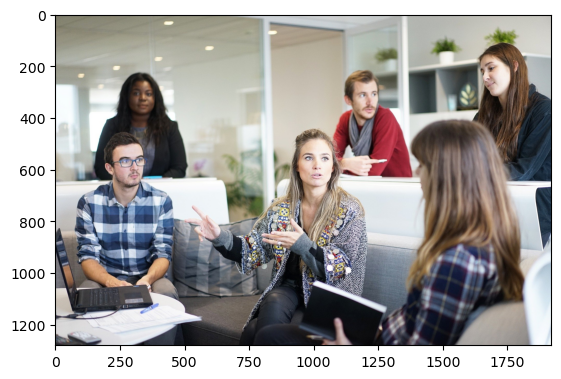

In [4]:
# carregamento da imagem 
# cv2.imshow(imagem)

import matplotlib.pyplot as plt
from cv2_plt_imshow import cv2_plt_imshow, plt_format
cv2_plt_imshow(imagem);

In [5]:
detector_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

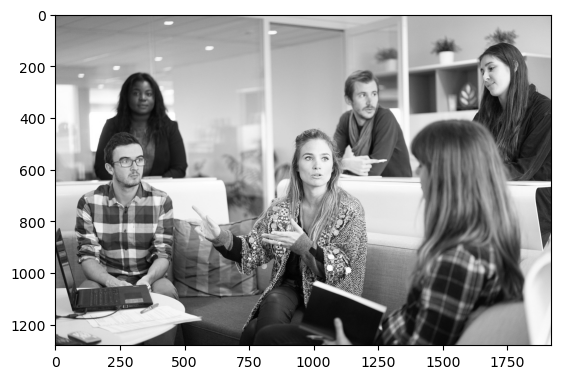

In [6]:
# converter RGB para escalas de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_plt_imshow(imagem_cinza);

In [7]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30,30))

In [8]:
deteccoes

array([[ 284,  262,  114,  114],
       [1635,  156,  147,  147],
       [ 222,  507,  151,  151],
       [ 928,  491,  171,  171],
       [1149,  260,  129,  129]])

In [9]:
len(deteccoes)

5

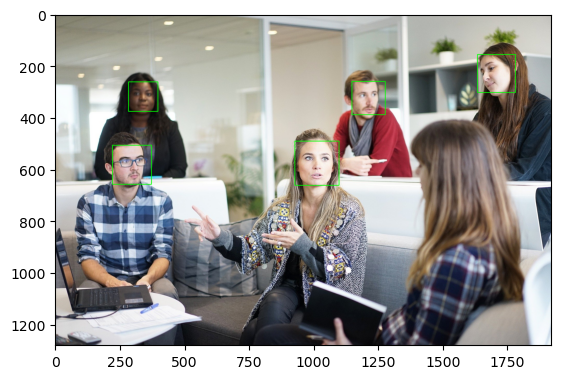

In [10]:
for (x, y, l, a) in deteccoes:
    cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2)
    # (x, y) = eixo X e eixo Y
    # (x + l, y + a) = inbox da detecção
    # (0, 255, 0) = cor do inbox - verde
    # 2 = tamanho da imagem
    
cv2_plt_imshow(imagem);

## Detecção de pessoas

In [11]:
imagem = cv2.imread('pessoas.jpg')

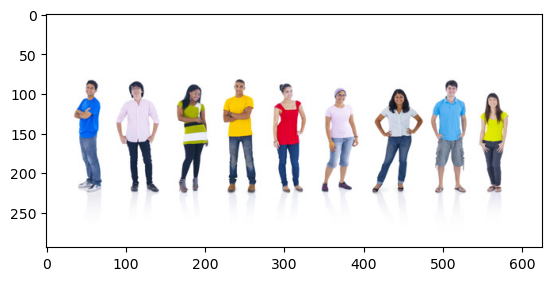

In [12]:
cv2_plt_imshow(imagem);

In [13]:
detector_pessoas = cv2.CascadeClassifier('fullbody.xml')

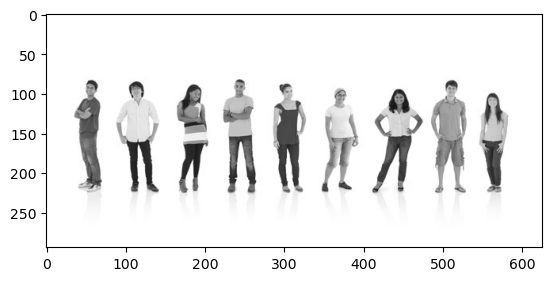

In [14]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_plt_imshow(imagem_cinza);

In [15]:
deteccoes = detector_pessoas.detectMultiScale(imagem_cinza, scaleFactor = 1.1, minSize=(50, 50))
deteccoes

array([[532, 103,  66, 133],
       [195,  47,  96, 192],
       [266,  80,  75, 151],
       [461,  60,  92, 184],
       [144, 100,  71, 142],
       [ 70,  57,  95, 189],
       [327,  69,  84, 169],
       [ 12,  66,  90, 180]])

In [16]:
len(deteccoes)

8

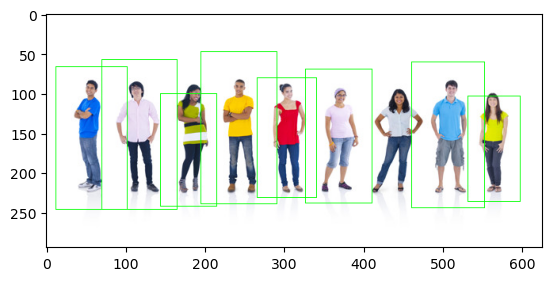

In [17]:
for x, y, l, a in deteccoes:
    cv2.rectangle(imagem, (x, y), (x + l, y + a), (0, 255, 0), 1)

cv2_plt_imshow(imagem);

## Reconhecimento facial

### Treinamento

In [18]:
from PIL import Image
import numpy as np

In [19]:
import zipfile
with zipfile.ZipFile('yalefaces.zip', 'r') as zip:
    zip.extractall()

In [20]:
import os
def dados_imagem():
    caminhos = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
    faces = []
    ids = []
    for caminho in caminhos:
        imagem = Image.open(caminho).convert('L') # L = apenas 1 canal será utilizado (escala de cinza)
        imagem_np = np.array(imagem, 'uint8')
        id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
        ids.append(id)
        faces.append(imagem_np)
    return np.array(ids), faces

In [21]:
ids, faces = dados_imagem()

In [22]:
print(ids)

[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11
 11 11 11 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15]


In [23]:
print(faces)

[array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 252, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 216, 224, 244],
       [255, 255, 255, ..., 215, 220, 245],
       [255, 255, 255, ..., 231, 211, 231],
       ...,
       [255, 255, 255, ..., 192, 197, 203],
       [255, 255, 255, ..., 189, 207, 215],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [24]:
import cv2.face

In [25]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

### Classificação

In [26]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('classificadorLBPH.yml')

In [27]:
imagem_teste = 'yalefaces/test/subject10.sad.gif'

In [28]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [29]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

10

In [30]:
idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

10

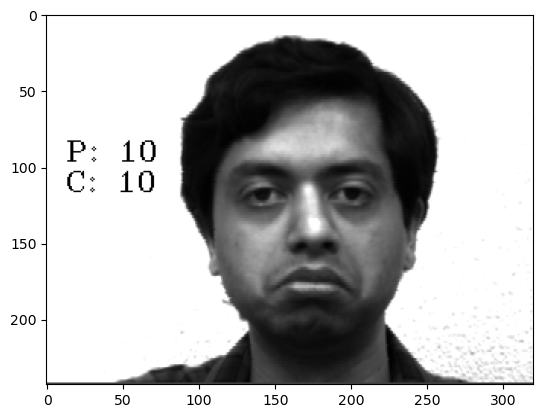

In [31]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x,y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x,y + 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_plt_imshow(imagem_np);